# Inferencing a Model

Inferencing a Model using a exported `.pkl` model.

In [1]:
from utils import *
from fastai2.vision.widgets import *

In [3]:
learn = load_learner("synths.pkl")

In [4]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

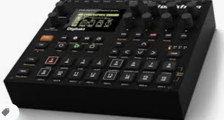

In [6]:
u_image = PILImage.create(uploader.data[-1])
u_image.to_thumb(224)

In [7]:
learn.predict(u_image)

('Digitakt', tensor(0), tensor([9.9945e-01, 3.1654e-04, 2.3820e-04]))

## Creating the GUI

For this, we are using Jupyter widgets to create a decent UI.

In [144]:
out_image = widgets.Output()
lbl_result = widgets.Label()

In [145]:
up_image = widgets.FileUpload()

def on_upload(change):
    img_uploaded = PILImage.create(up_image.data[-1])
    out_image.clear_output()
    out_image.value = img_uploaded;
    with out_image:
        display(img_uploaded.to_thumb(224))
        
    btn_predict.disabled = False
    lbl_result.value = ''
    
up_image.observe(on_upload, names='data')

In [146]:
btn_predict = widgets.Button(description="Predict")

def onclick_btn_predit(change): 
    img_uploaded = out_image.value
    pred, pred_id, pred_probs = learn.predict(img_uploaded)
    lbl_result.value = f'Prediction: "{pred}" with probability: "{pred_probs[pred_id]:0.4f}"'
    btn_predict.disabled = True
    
btn_predict.on_click(onclick_btn_predit)
btn_predict.disabled = True

In [147]:
VBox([
    widgets.HTML("<h3>Predict the Synth</h3>"),
    up_image,
    out_image,
    btn_predict,
    lbl_result
])